# Series de Tiempo - FBprophet

**Fecha**: 0623

**Objetivo**:

Los análisis de series de tiempo son útiles para comprender patrones y predecir valores futuros en datos secuenciales. Prophet en Python es una biblioteca que simplifica este proceso. Permite explorar, ajustar modelos y realizar predicciones precisas, capturando tendencias, estacionalidades y días festivos. Es una herramienta poderosa para pronósticos precisos.

In [111]:
# Procesamiento de datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualizaciones
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns

# Estadística
from scipy.stats import levene, shapiro

# Reg Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config


In [49]:
!apt-get install -y gcc libgcc
!pip install --no-cache-dir fbprophet


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgcc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 213.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 200.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 178.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 190.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 190.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 162.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 152.1 MB/s eta 0:00:00
  er

## **Paso #1**: Carga y procesamiento de bases (compartir archivos)

In [2]:
!ls

fundamentals.csv  prices-split-adjusted.csv  securities.csv
prices.csv	  sample_data


In [3]:
# Load your dataset or use any database you find online
sct = pd.read_csv('securities.csv')
sct.head(3)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152


In [4]:
# Load your dataset or use any database you find online
psa = pd.read_csv('prices-split-adjusted.csv')
psa.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [5]:
# Load your dataset or use any database you find online
fd = pd.read_csv('fundamentals.csv')
fd.head(3)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08


In [6]:
# Load your dataset or use any database you find online
df = pd.read_csv('prices.csv')
df.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159108 entries, 0 to 159107
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    159108 non-null  object 
 1   symbol  159108 non-null  object 
 2   open    159108 non-null  float64
 3   close   159108 non-null  float64
 4   low     159108 non-null  float64
 5   high    159108 non-null  float64
 6   volume  159108 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.5+ MB


In [8]:
# Hay 501 acciones diferentes a analizar, veamos las de Amazon
df['symbol'].nunique()

471

In [9]:
# Base donde sólo se considera las de AMZN
df_1= df[df['symbol']=='AMZN']
df_1.head(3)

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0


In [10]:
# Principales estadísticos
df_1.describe()

,open,close,low,high,volume
count,339.000000,339.000000,339.000000,339.000000,3.390000e+02
mean,149.400413,149.616549,147.416283,151.419086,6.822315e+06
std,25.515150,25.551797,25.503532,25.579040,4.318292e+06
min,105.930000,108.610001,105.800003,111.290001,1.961200e+06
25%,126.160000,126.174999,124.200001,127.865002,4.600300e+06
50%,144.500000,144.279999,142.419998,146.440002,5.706000e+06
75%,173.815002,174.434998,172.619995,175.919998,7.419300e+06
max,201.000000,201.190002,196.690002,203.419998,4.242110e+07


In [11]:
# Modificar 'date' para que se lea en formato 'datetime'
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 284 to 158842
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    339 non-null    datetime64[ns]
 1   symbol  339 non-null    object        
 2   open    339 non-null    float64       
 3   close   339 non-null    float64       
 4   low     339 non-null    float64       
 5   high    339 non-null    float64       
 6   volume  339 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 21.2+ KB


<ipython-input-11-58a5a6d0d484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['date'] = pd.to_datetime(df_1['date'])


In [12]:
# Histórico
print("Max Fecha : {}".format(df_1['date'].min()))
print("Min Fecha : {}".format(df_1['date'].max()))

Max Fecha : 2010-01-04 00:00:00
Min Fecha : 2011-05-06 00:00:00


## **Paso #2**: Exploración de Datos

Text(0.5, 1.0, 'AMZN Stock value: 2010-2016')

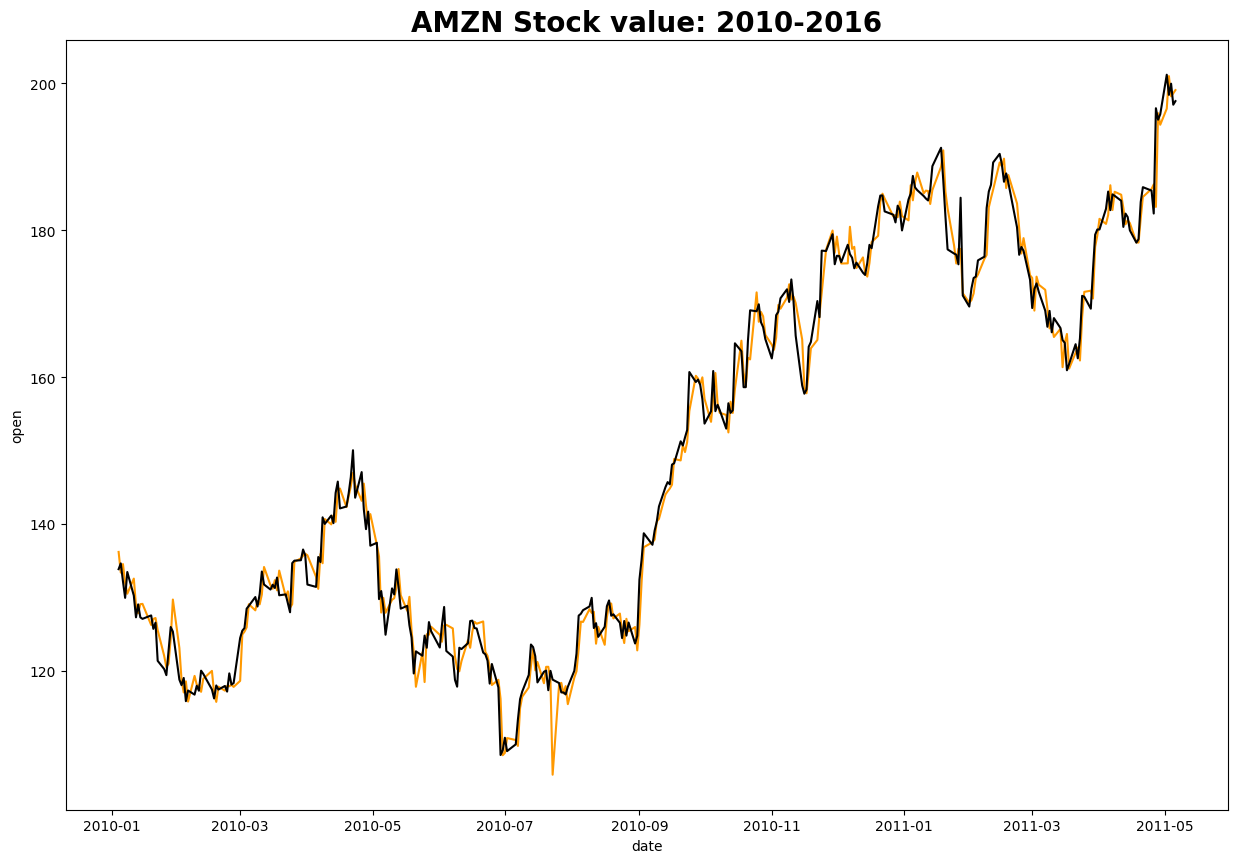

In [13]:
fig=plt.figure(figsize=(15,10))
colors = ['#FF9900','#000000']

ax = sns.lineplot(data=df_1, x='date',y='open', color=colors[0])
ax = sns.lineplot(data=df_1, x='date',y='close', color=colors[1])

plt.title("AMZN Stock value: 2010-2016", size=20, weight='bold')

**¿Hay normalidad en la base de datos?**

In [14]:
# Quitar las variables tipo categóricas y datetime
int_cols = df_1.select_dtypes(exclude=['object','datetime64']).columns.to_list()

# Prueba de Normalidad para cada variable numérica
for i in int_cols:
    _, p_value = shapiro(df_1[i])
    if p_value < 0.05:
        print("La variable '{}' NO cuenta con una distribución Normal".format(i))
    else:
        print("La variable '{}' SÍ cuenta con una distribución Normal".format(i))

La variable 'open' NO cuenta con una distribución Normal
La variable 'close' NO cuenta con una distribución Normal
La variable 'low' NO cuenta con una distribución Normal
La variable 'high' NO cuenta con una distribución Normal
La variable 'volume' NO cuenta con una distribución Normal


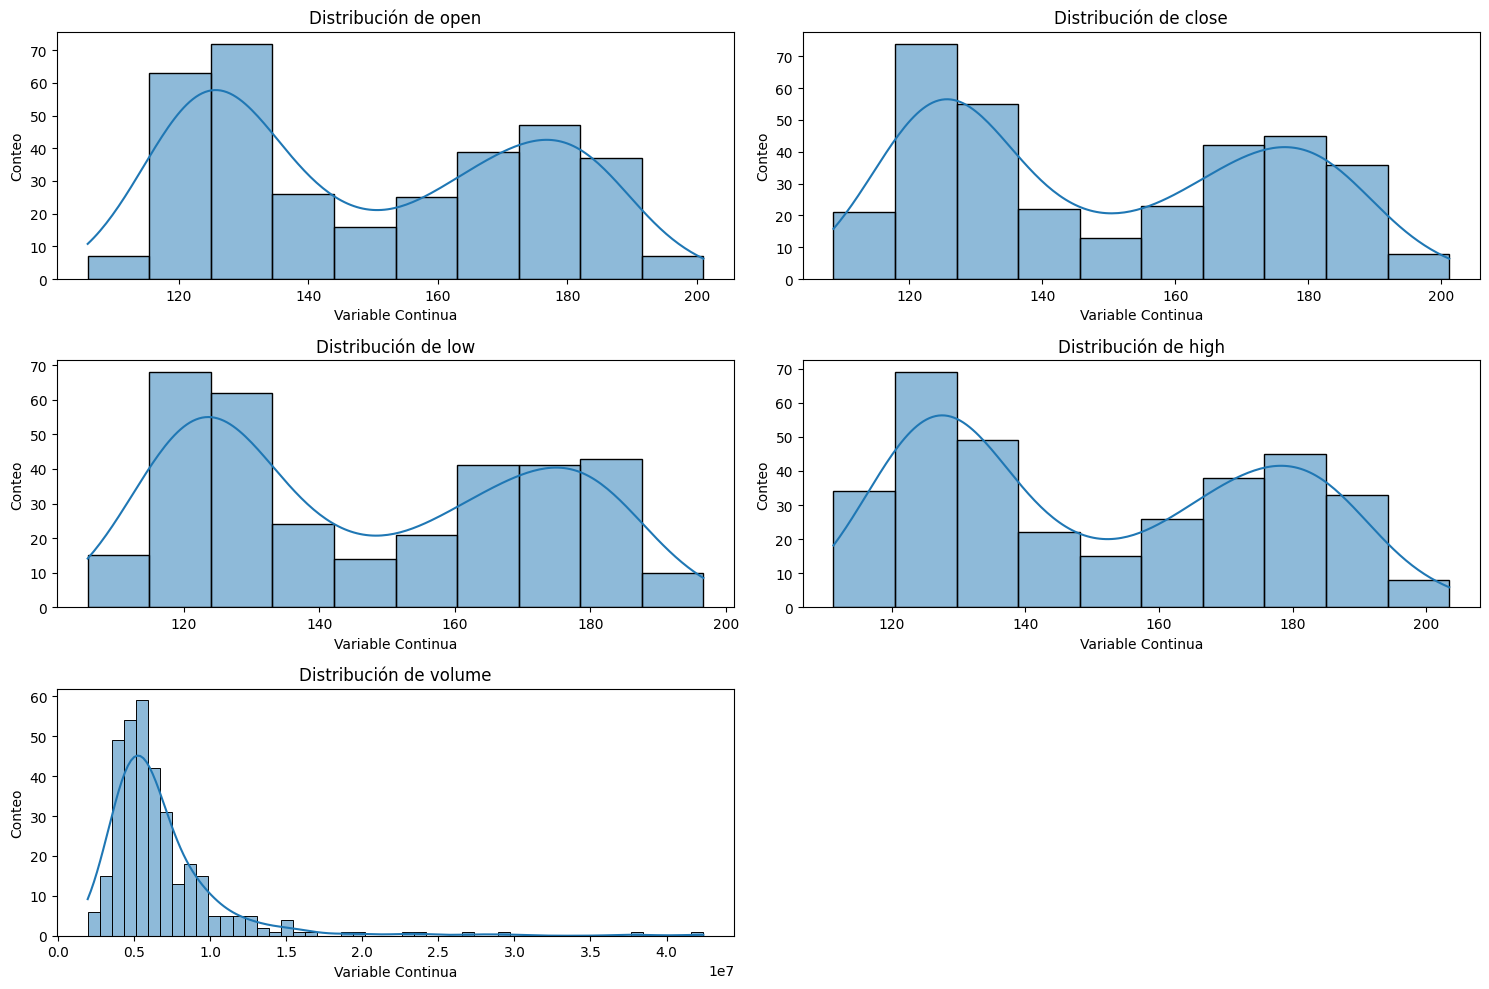

In [15]:
# Foor-loop de gráficas
num_cols = 2
num_rows = (len(int_cols) + num_cols - 1) // num_cols

fig = plt.figure(figsize=(15, 10))
grid = gridspec.GridSpec(num_rows, num_cols, figure=fig)

for index, i in enumerate(int_cols):
    ax = fig.add_subplot(grid[index])

    sns.histplot(data=df_1, x=i, kde=True, ax=ax)

    ax.set_title("Distribución de {}".format(i))
    ax.set_xlabel('Variable Continua')
    ax.set_ylabel('Conteo')

plt.tight_layout()
plt.show()


## **Paso #3**: Procesamiento de Datos

In [16]:
# Definir las vriables a utilizar en el modelo
X = df_1[['volume','open']]
y = df_1['close']

In [17]:
# División de la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=42)

In [18]:
# Estandarizción de las variables independientes
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Nota**: Este enfoque garantiza que el escalado se base únicamente en los datos de entrenamiento, evitando cualquier filtración de información de los datos de prueba al proceso de entrenamiento.

## **Paso #4**: Construcción de modelos

### a) Regresión Lineal

In [22]:
# Entrenamiento
model = LinearRegression()
model.fit(X_train,y_train)

set_config(display='diagram')

# Predicción
pred=model.predict(X_test)

# Estadísticos Modelo
sc = np.round(model.score(X_test, y_test),2) * 100
r2 = np.round(r2_score(y_test,pred),2)
mse = np.round(mean_squared_error(y_test,pred),2)

print("Score: ", sc)
print("R2: ", r2)
print("MSE: ", mse)

Score:  91.0
R2:  0.91
MSE:  7.34


Text(0.5, 1.0, 'Valores del Test Set vs Predicciones')

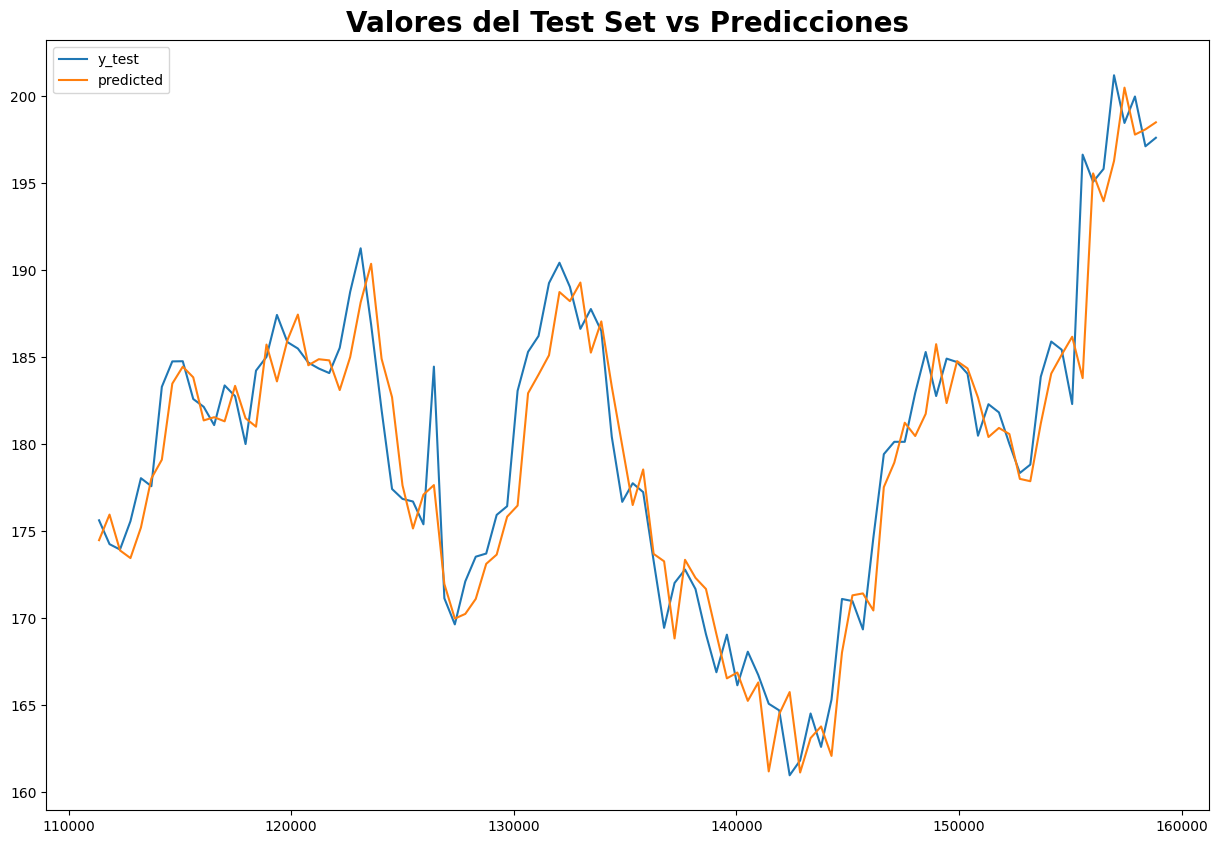

In [28]:
# Visualización de predicciones
fig = plt.figure(figsize=(15,10))
p = pd.Series(pred, index = y_test.index)

plt.plot(y_test)
plt.plot(p)

plt.legend(['y_test','predicted'])
plt.title("Valores del Test Set vs Predicciones", size=20, weight='bold')

In [34]:
correlation = X['open'].corr(y)
print("Correlation:", correlation)

Correlation: 0.9946398846030698


### b) Prophet

In [66]:
#!pip install pystan==2.19.1.1
#!pip install convertdate
#!pip install lunarcalendar
#!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# NN
from prophet import Prophet


In [97]:
# Tiene que tener un nombre particular las columnas para correr Prophet
df_1_ts = df_1.copy()
df_1_ts = df_1_ts[['date', 'close']]
df_1_ts.columns = ['ds', 'y']

In [98]:
# Entrenamiento
model = Prophet()

# Considera los días festivos de un país
model.add_country_holidays(country_name='US')

model.fit(df_1_ts)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_nytkn5/osy9mn5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_nytkn5/b57hqmxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21518', 'data', 'file=/tmp/tmpl_nytkn5/osy9mn5s.json', 'init=/tmp/tmpl_nytkn5/b57hqmxj.json', 'output', 'file=/tmp/tmpl_nytkn5/prophet_modelgvg86bpy/prophet_model-20230626173754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:37:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


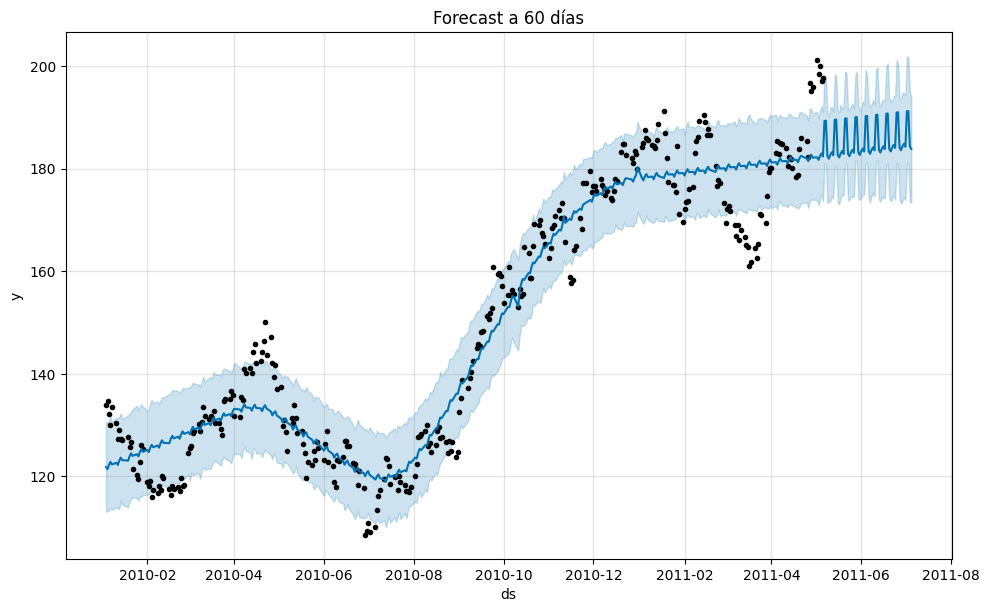

In [99]:
# Predicción
future = model.make_future_dataframe(periods=60)  # 60 días de predicción
forecast = model.predict(future)

model.plot(forecast)
plt.title('Forecast a 60 días')
plt.show()

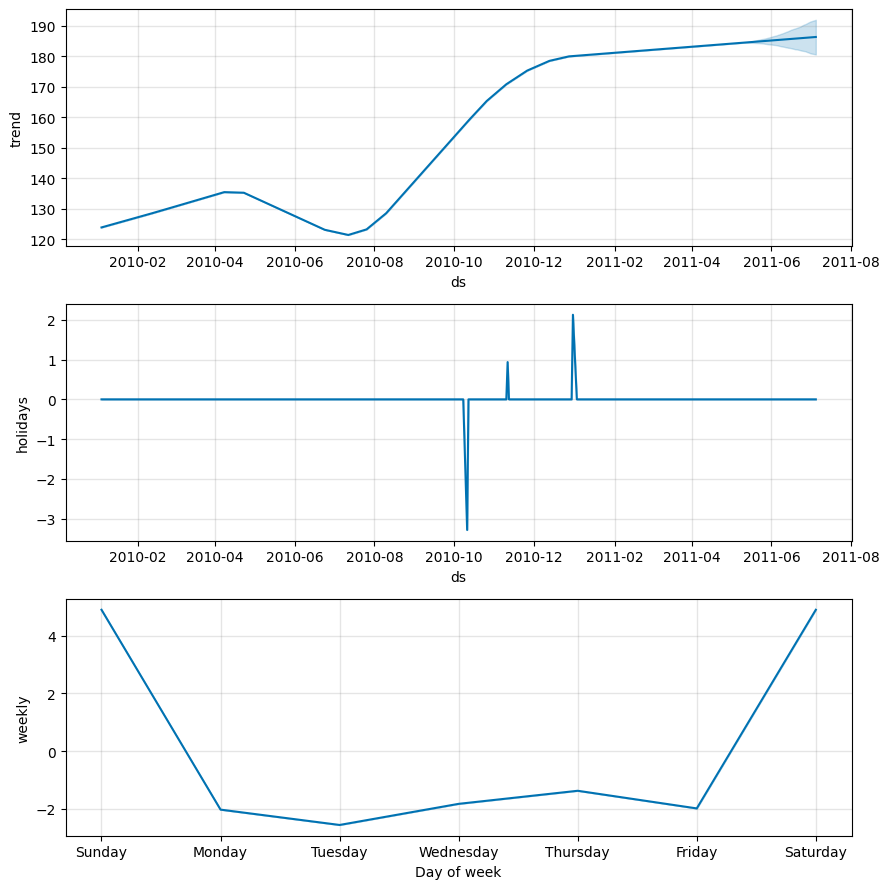

In [100]:
# Componentes de Prophet
model.plot_components(forecast)

plt.show()

In [91]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,123.962817,113.419560,130.984161,123.962817,123.962817,-2.047969,-2.047969,-2.047969,-2.047969,-2.047969,-2.047969,0.0,0.0,0.0,121.914848
1,2010-01-05,124.080552,113.058234,130.213634,124.080552,124.080552,-2.542220,-2.542220,-2.542220,-2.542220,-2.542220,-2.542220,0.0,0.0,0.0,121.538332
2,2010-01-06,124.198286,113.520047,130.981619,124.198286,124.198286,-1.793987,-1.793987,-1.793987,-1.793987,-1.793987,-1.793987,0.0,0.0,0.0,122.404299


Los **términos aditivos** se representan mediante las columnas que comienzan con "additive_terms". Estos términos capturan patrones estacionales que se suman a la tendencia general de la serie de tiempo. Por ejemplo, si hay un aumento estacional en la demanda de productos durante ciertos meses del año, el término aditivo capturaría ese patrón estacional positivo.

Los **términos multiplicativos** se representan mediante las columnas que comienzan con "multiplicative_terms". Estos términos capturan patrones estacionales que se multiplican a la tendencia general de la serie de tiempo. Si el efecto estacional tiene una influencia proporcional en la serie de tiempo, se utilizaría un término multiplicativo. Por ejemplo, si la demanda de energía eléctrica aumenta proporcionalmente durante los meses más fríos del año, el término multiplicativo capturaría ese patrón estacional multiplicativo.

In [104]:
# Parámetros
model_params = model.params
model_params

OrderedDict([('lp__', array([[908.939]])),
             ('k', array([[0.288823]])),
             ('m', array([[0.615528]])),
             ('delta',
              array([[ 8.19187e-09,  1.02379e-02,  5.61321e-03, -1.15502e-08,
                       9.06297e-09, -3.36751e-01, -4.43174e-01, -4.36623e-09,
                      -6.98815e-09,  8.25367e-08,  2.47440e-01,  5.44881e-01,
                       5.38933e-01,  3.12992e-01,  1.42168e-05,  2.43317e-08,
                      -4.11347e-09, -5.33012e-02, -2.29655e-01, -2.06550e-01,
                      -2.25274e-01, -2.15819e-01, -1.56915e-01, -8.07348e-10,
                      -3.50778e-09]])),
             ('sigma_obs', array([[0.0337745]])),
             ('beta',
              array([[ 0.0144178 , -0.00974123, -0.0125054 , -0.00119866,  0.00121192,
                       0.00409121,  0.        ,  0.        , -0.0163338 ,  0.        ,
                       0.        ,  0.        ,  0.        ,  0.        ,  0.01058   ,
           

**`Explicación de los parámetros`**

**1) k**: Este parámetro representa el número de puntos de cambio (changepoints). Determina la cantidad de puntos potenciales en el tiempo donde la trayectoria de la serie temporal puede experimentar cambios significativos.

**2) delta**: El parámetro delta denota la tasa de cambio en cada punto de cambio. Refleja la magnitud del cambio que ocurre en un punto de cambio específico.

**3) beta**: Beta representa los coeficientes para los diferentes componentes del modelo, como la tendencia, la estacionalidad y los días festivos. Captura la contribución e impacto de cada componente en la serie temporal.

**4) sigma_obs**: Sigma_obs es la desviación estándar estimada del ruido de observación. Representa la cantidad de variabilidad o incertidumbre en los valores observados de la serie temporal.

**5) trend**: Trend representa el componente de tendencia estimado de la serie temporal. Captura la dirección general y la trayectoria de los datos.

**6) seasonalities**: Este parámetro proporciona información sobre los componentes estacionales estimados en los datos. Incluye las estacionalidades anuales, semanales y diarias, si se han habilitado en el modelo.

**7) holidays**: El parámetro holidays contiene información sobre los efectos estimados de los días festivos o eventos incluidos en el modelo. Captura el impacto de días festivos específicos en la serie temporal.

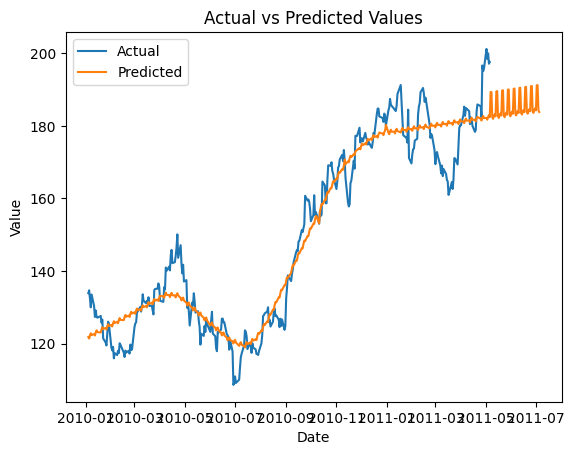

In [110]:
fig, ax = plt.subplots()

ax.plot(df_1_ts['ds'], df_1_ts['y'], label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted')

ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted Values')

plt.legend()
plt.show()